# Modeling

The idea will be to split the data into train and test and see if we can predict the closure of a restaurant based on the attributes. 

In [7]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score  
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score

In [41]:
data = pd.read_csv('data.csv', index_col=0)

In [42]:
data.head()

,attributes.Ambience.divey,attributes.Dietary Restrictions.vegan,attributes.Happy Hour,attributes.Order at Counter,attributes.Outdoor Seating,attributes.Alcohol,attributes.Ambience.classy,attributes.Parking.lot,attributes.Ambience.touristy,attributes.Good For.brunch,...,attributes.Ambience.intimate,attributes.Good For.latenight,attributes.Good For.dinner,attributes.Good for Kids,attributes.Parking.validated,attributes.Has TV,attributes.Ambience.casual,attributes.Good For Groups,attributes.Ambience.romantic,attributes.Ambience.upscale
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
1,0,0,0,0,0,1,0,1,0,1,...,0,0,0,1,0,1,1,1,0,0
2,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,1,0,...,0,0,1,1,0,0,0,1,0,0
4,1,0,0,0,0,1,0,1,0,0,...,0,0,1,1,0,1,0,1,0,0


In [87]:
data.columns

Index(['attributes.Ambience.divey', 'attributes.Dietary Restrictions.vegan',
       'attributes.Happy Hour', 'attributes.Order at Counter',
       'attributes.Outdoor Seating', 'attributes.Alcohol',
       'attributes.Ambience.classy', 'attributes.Parking.lot',
       'attributes.Ambience.touristy', 'attributes.Good For.brunch',
       'attributes.Waiter Service', 'attributes.Parking.street',
       'attributes.Ambience.hipster', 'attributes.Music.live',
       'attributes.Dietary Restrictions.dairy-free',
       'attributes.Music.background_music', 'attributes.Price Range',
       'attributes.Good For.breakfast', 'attributes.Parking.garage',
       'attributes.Music.karaoke', 'review_count', 'attributes.Good For.lunch',
       'attributes.Parking.valet', 'attributes.Take-out',
       'attributes.Good For.dessert', 'attributes.Takes Reservations',
       'attributes.Ambience.trendy', 'attributes.Delivery', 'attributes.Wi-Fi',
       'open', 'attributes.Wheelchair Accessible', 'stars',


In [43]:
data.describe()

+: 0, 1, 9, 31, 35
    Divey, vegan, brunch, waiter service, good for dinner, stars, take out
-: 3,4, 10, 24, 26, 29, 34  
    order at counter, outdoor seating, latenight, wifi, delivery

,attributes.Ambience.divey,attributes.Dietary Restrictions.vegan,attributes.Happy Hour,attributes.Order at Counter,attributes.Outdoor Seating,attributes.Alcohol,attributes.Ambience.classy,attributes.Parking.lot,attributes.Ambience.touristy,attributes.Good For.brunch,...,attributes.Ambience.intimate,attributes.Good For.latenight,attributes.Good For.dinner,attributes.Good for Kids,attributes.Parking.validated,attributes.Has TV,attributes.Ambience.casual,attributes.Good For Groups,attributes.Ambience.romantic,attributes.Ambience.upscale
count,18325.000000,18325.000000,18325.000000,18325.000000,18325.000000,18325.000000,18325.000000,18325.000000,18325.000000,18325.000000,...,18325.000000,18325.000000,18325.000000,18325.000000,18325.000000,18325.000000,18325.000000,18325.000000,18325.000000,18325.000000
mean,0.020518,0.003383,0.057080,0.011241,0.327585,0.536426,0.015007,0.539482,0.005184,0.025211,...,0.005948,0.036344,0.397435,0.809986,0.003547,0.462156,0.502483,0.847749,0.009277,0.007040
std,0.141769,0.058070,0.232003,0.105431,0.469345,0.498685,0.121583,0.498452,0.071816,0.156771,...,0.076897,0.187149,0.489381,0.392322,0.059453,0.498579,0.500007,0.359274,0.095872,0.083609
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
#Shuffle dataset

data = data.sample(frac=1, random_state=25).reset_index(drop=True)

In [45]:
#preprocessing & split data into y, X and then into train and test.
def preprocess_inputs(dataframe):
    #Split y, X
    y= dataframe['open']
    X=dataframe.drop('open', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, shuffle=True, random_state=25)
    return X_train, X_test, y_train, y_test

In [46]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [47]:
y_train.value_counts()

1    10358
0     2469
Name: open, dtype: int64

In [48]:
y_test.value_counts()

1    4453
0    1045
Name: open, dtype: int64

#### Logistic Regression

In [49]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.decision_function(X_test)
    
print("Logistic Regression:" + " {:.2f}%".format(logistic_model.score(X_test, y_test)*100))


Logistic Regression: 82.38%


C:\Users\ziggy\anaconda3\envs\Springboard\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
coefs = logistic_model.coef_[0]

print("Coefficients: \n", logistic_model.coef_)



Coefficients: 
 [[ 7.42524716e-01 -1.29703706e-01  3.48532417e-01 -5.26391872e-01
  -5.18480296e-01 -5.76603706e-02  2.52645846e-01 -8.22731143e-02
   2.43577326e-01  6.78961878e-01 -9.32902521e-01  1.82905744e-01
  -1.20862197e-01 -2.97256513e-01 -3.73680419e-01 -8.33645123e-04
   1.59649854e-03  5.59839368e-02 -3.20377350e-01 -1.12325082e-01
   1.23932653e-02 -7.36652335e-02 -2.78715789e-01 -3.88181327e-01
  -5.65851776e-01 -6.57995398e-02 -7.75740591e-01 -2.58326460e-01
   3.36330367e-01 -5.88195857e-01 -3.68392105e-02  4.27570995e-01
   2.43792842e-02 -3.21216977e-02 -5.55689914e-01  4.39913356e-01
  -3.29699642e-01  2.62848597e-01  1.08326781e-01  2.77796355e-03
   2.66217057e-01  1.35816998e-02]]


In [85]:
for i,v in enumerate(coefs):
    print('Feature ' + str(i) + ':' +' Score:' + str(v))

Feature 0: Score:0.7425247159636441
Feature 1: Score:-0.12970370628237154
Feature 2: Score:0.34853241699368126
Feature 3: Score:-0.5263918717712082
Feature 4: Score:-0.5184802964000307
Feature 5: Score:-0.05766037059214371
Feature 6: Score:0.2526458462919543
Feature 7: Score:-0.08227311431539124
Feature 8: Score:0.24357732619950714
Feature 9: Score:0.6789618781307474
Feature 10: Score:-0.9329025210996288
Feature 11: Score:0.1829057436088153
Feature 12: Score:-0.12086219675941029
Feature 13: Score:-0.29725651310239165
Feature 14: Score:-0.37368041922221196
Feature 15: Score:-0.0008336451234707237
Feature 16: Score:0.0015964985383982715
Feature 17: Score:0.05598393677959862
Feature 18: Score:-0.32037734995196276
Feature 19: Score:-0.11232508184580198
Feature 20: Score:0.012393265259045988
Feature 21: Score:-0.07366523347592575
Feature 22: Score:-0.2787157892801568
Feature 23: Score:-0.38818132734208033
Feature 24: Score:-0.5658517760055335
Feature 25: Score:-0.06579953979441609
Feature 2

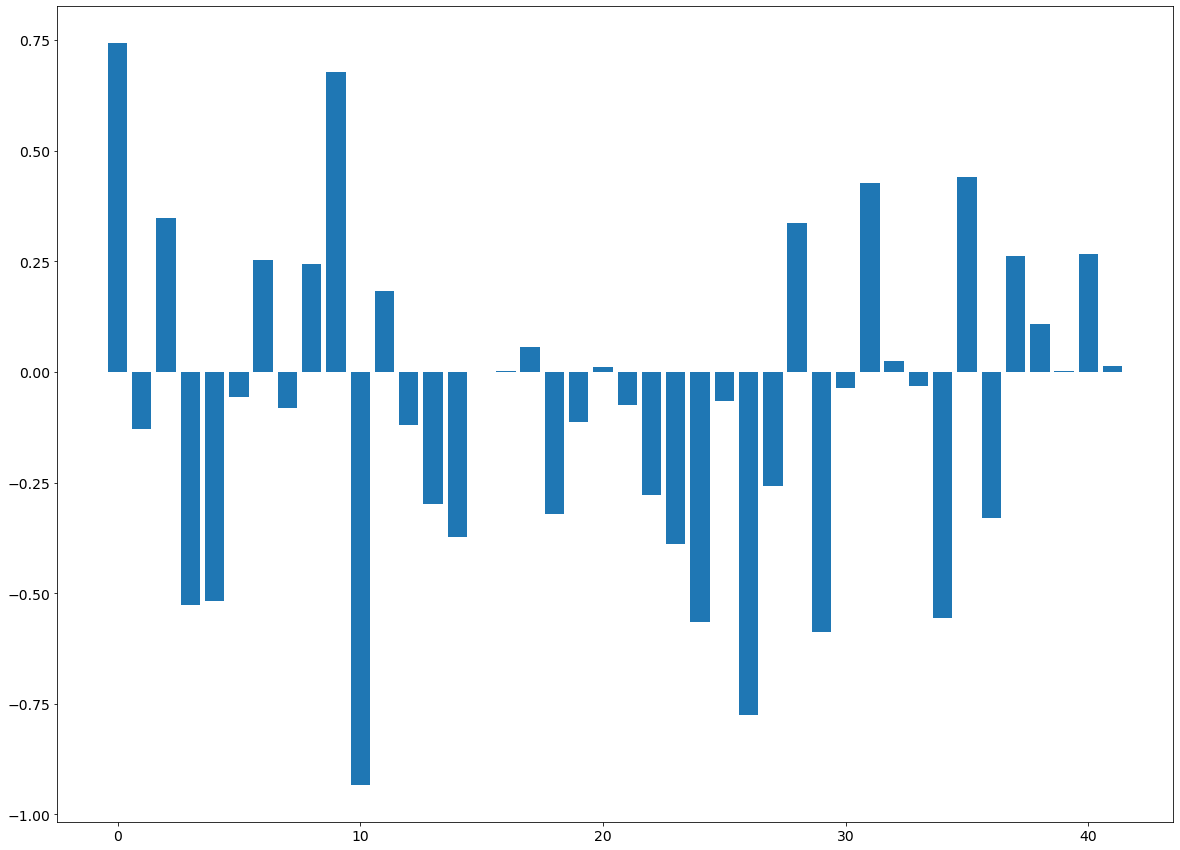

In [80]:
plt.bar([x for x in range(len(coefs))], coefs)
plt.show()

In [51]:
logistic_model.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### K-Nearest Neigbors

In [52]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)

y_pred_KNN = KNN_model.predict_proba(X_test)
    
print("K-Nearest Neighbors:" + " {:.2f}%".format(KNN_model.score(X_test, y_test)*100))


K-Nearest Neighbors: 81.03%


#### Decision Tree

In [53]:
Tree_model = DecisionTreeClassifier()
Tree_model.fit(X_train, y_train)

y_pred_tree = Tree_model.predict(X_test)
    
print("Decision Tree:" + " {:.2f}%".format(Tree_model.score(X_test, y_test)*100))

Decision Tree: 73.03%


In [54]:
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

[[ 371  674]
 [ 809 3644]]
              precision    recall  f1-score   support

           0       0.31      0.36      0.33      1045
           1       0.84      0.82      0.83      4453

    accuracy                           0.73      5498
   macro avg       0.58      0.59      0.58      5498
weighted avg       0.74      0.73      0.74      5498



#### Support Vector Machine (Linear Kernel)

In [55]:
SVM_model = LinearSVC()
SVM_model.fit(X_train, y_train)

y_pred_SVM = SVM_model.decision_function(X_test)
    
print("Support Vector Machine (Linear Kernel):" + " {:.2f}%".format(SVM_model.score(X_test, y_test)*100))


Support Vector Machine (Linear Kernel): 82.36%


C:\Users\ziggy\anaconda3\envs\Springboard\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### Support Vector Machine (RBF Kernel)

In [56]:
SVC_model = SVC()
SVC_model.fit(X_train, y_train)

y_pred_SVC = SVC_model.decision_function(X_test)
    
print("Support Vector Machine (RBF Kernel):" + " {:.2f}%".format(SVC_model.score(X_test, y_test)*100))

Support Vector Machine (RBF Kernel): 80.99%


#### Neural Network

In [57]:
Neural_model = MLPClassifier()
Neural_model.fit(X_train, y_train)


  
print("Neural Network:" + " {:.2f}%".format(Neural_model.score(X_test, y_test)*100))

Neural Network: 83.05%


C:\Users\ziggy\anaconda3\envs\Springboard\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Random Forest

In [58]:
Forest_model = RandomForestClassifier()
Forest_model.fit(X_train, y_train)

y_pred_forest = Forest_model.predict(X_test)
    
print("Random Forest:" + " {:.2f}%".format(Forest_model.score(X_test, y_test)*100))

Random Forest: 82.65%


In [59]:
#feature importance
Forest_model.feature_importances_

array([0.00479284, 0.00116513, 0.00840361, 0.00440527, 0.03042375,
       0.02891494, 0.00296653, 0.0305556 , 0.00179048, 0.00423895,
       0.02971734, 0.02731778, 0.00195293, 0.00369279, 0.02754258,
       0.04208412, 0.04712646, 0.00929193, 0.00881681, 0.00091503,
       0.22348009, 0.0270006 , 0.00512841, 0.02376216, 0.00416751,
       0.02542264, 0.02727191, 0.02870294, 0.02349558, 0.0208021 ,
       0.11949455, 0.01934444, 0.00232931, 0.00773843, 0.02571639,
       0.01871986, 0.00193826, 0.02969538, 0.027488  , 0.01793311,
       0.00242681, 0.00182666])

<BarContainer object of 42 artists>

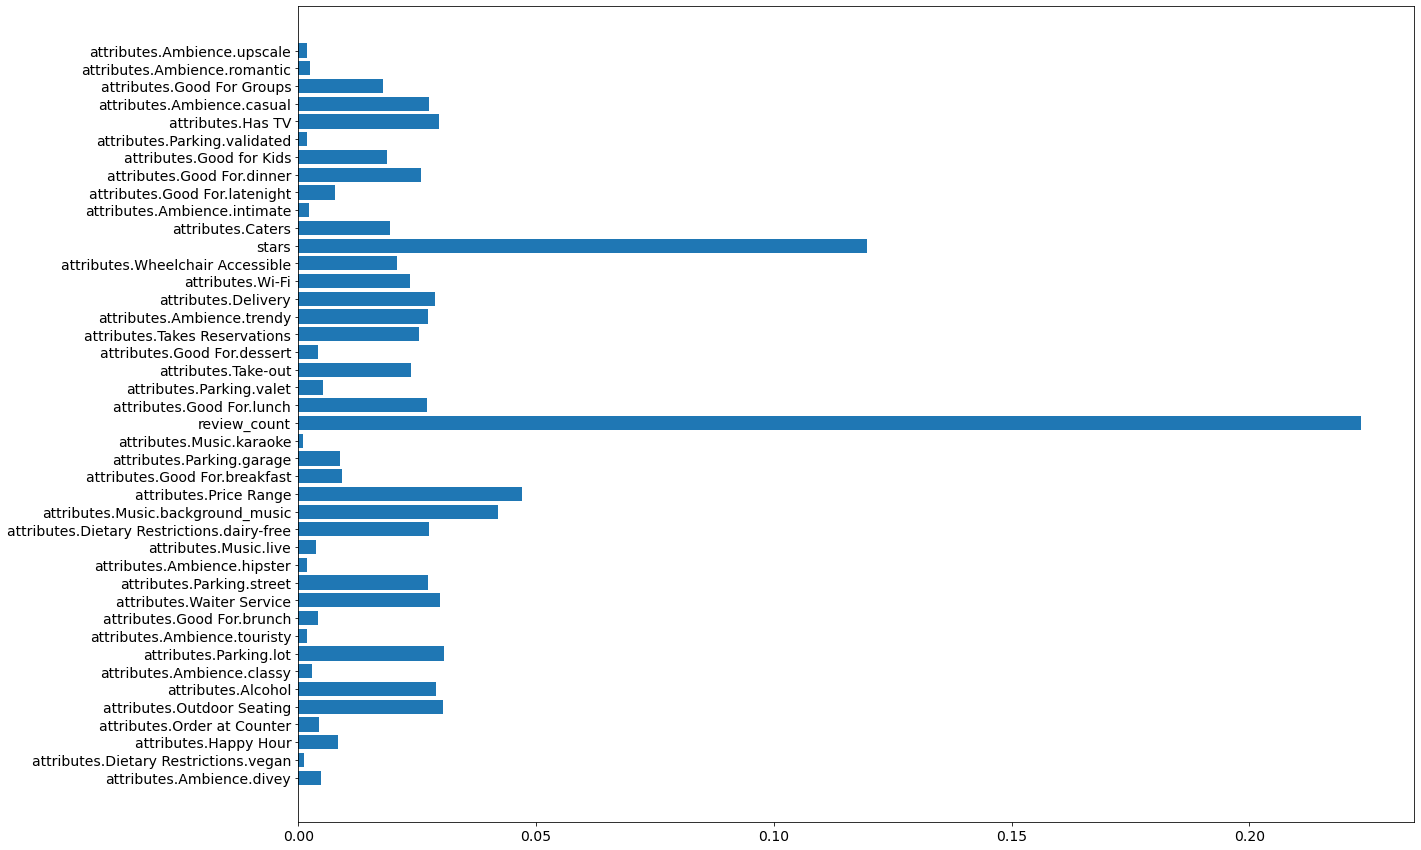

In [60]:
plt.rcParams.update({'figure.figsize': (20.0, 15.0)})
plt.rcParams.update({'font.size': 14})
plt.barh(X_test.columns, Forest_model.feature_importances_)



Text(0.5, 0, 'Random Forest Feature Importance')

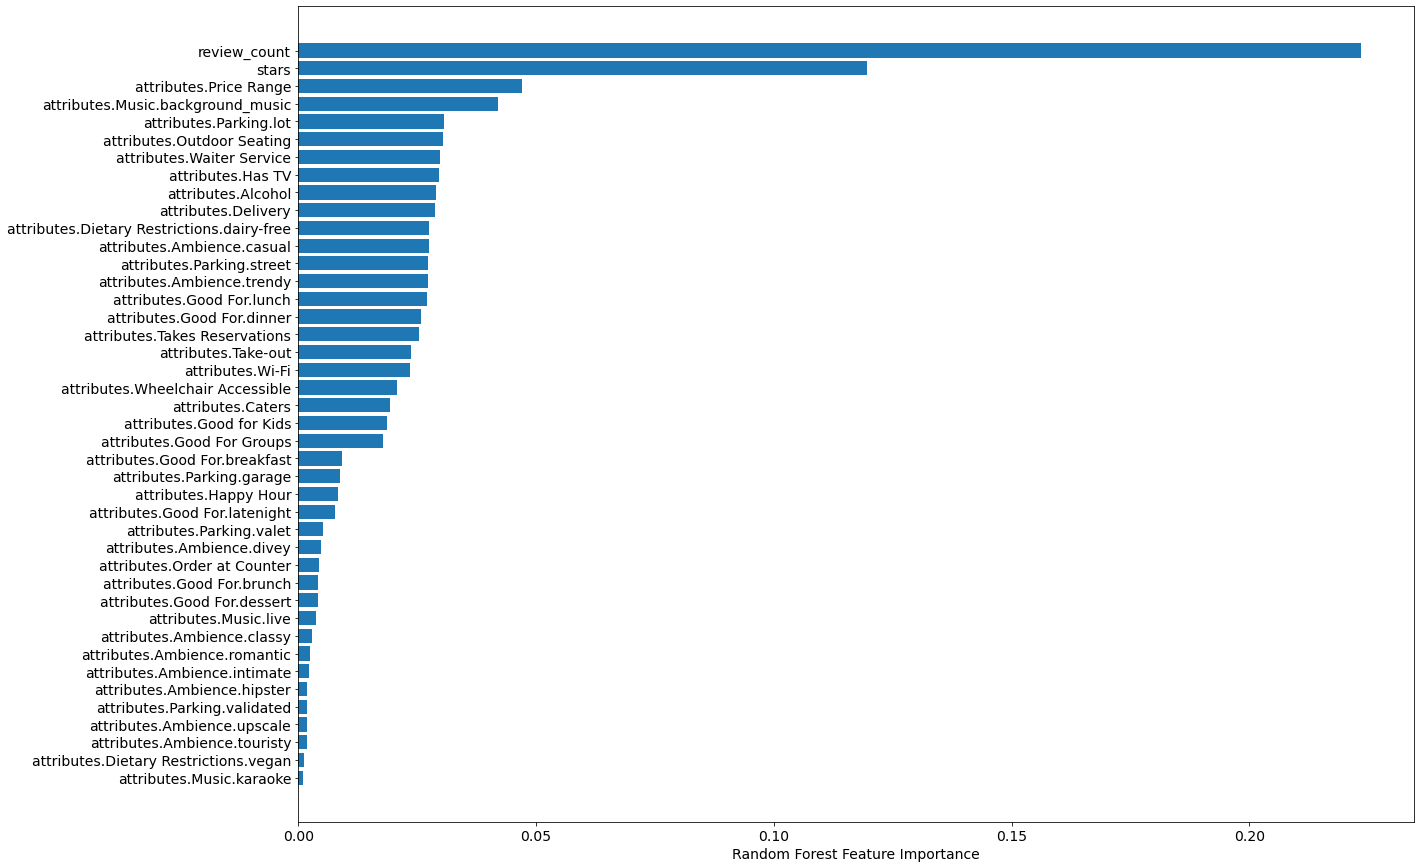

In [66]:
sorted_idx = Forest_model.feature_importances_.argsort()
plt.barh(X_test.columns[sorted_idx], Forest_model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#### Gradient Boosting

In [61]:
Gradient_model = GradientBoostingClassifier()
Gradient_model.fit(X_train, y_train)

#y_pred_Neural = Neural_model.decision_function(X_test)
    
print("Gradient Boosting:" + " {:.2f}%".format(Gradient_model.score(X_test, y_test)*100))

Gradient Boosting: 82.94%


#### ROC curve 

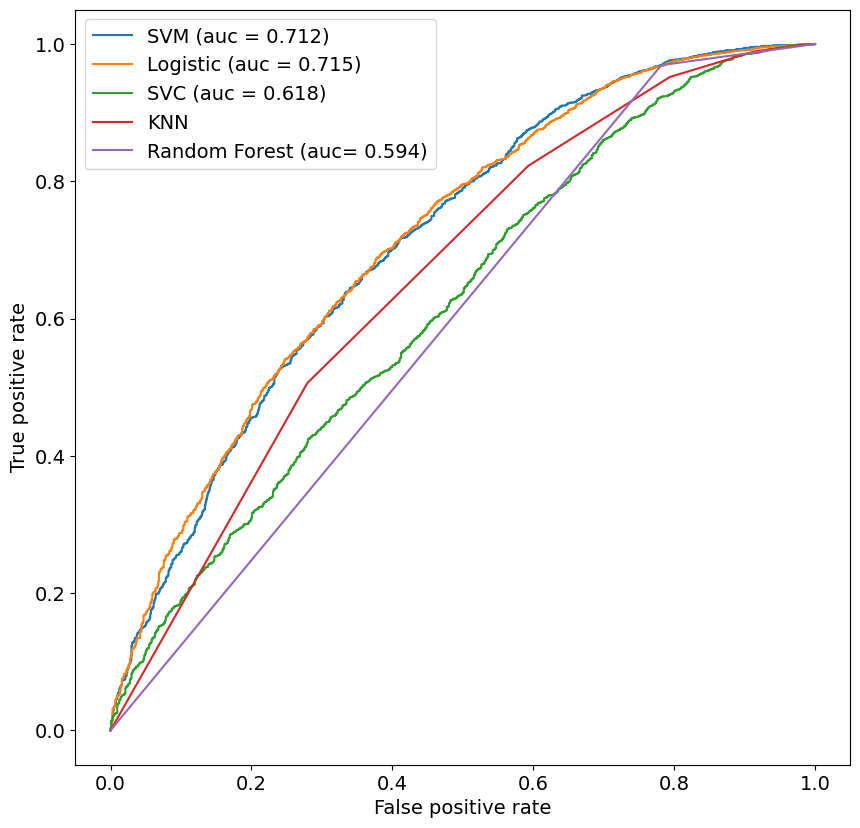

In [62]:
#ROC curve for Logistic, KNN, SVMs

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_KNN[:,1])

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_SVM)
auc_svm = auc(svm_fpr, svm_tpr)

svc_fpr, svc_tpr, threshold = roc_curve(y_test, y_pred_SVC)
auc_svc = auc(svc_fpr, svc_tpr)

forest_fpr, forest_tpr, threshold = roc_curve(y_test, y_pred_forest)
auc_forest = auc(forest_fpr, forest_tpr)

plt.figure(figsize=(10,10), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label="SVM (auc = %0.3f)" % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, linestyle='-', label="Logistic (auc = %0.3f)" % auc_logistic)
plt.plot(svc_fpr, svc_tpr, linestyle='-', label="SVC (auc = %0.3f)" % auc_svc)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label="KNN")
plt.plot(forest_fpr, forest_tpr,linestyle='-', label="Random Forest (auc= %0.3f)" % auc_forest)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
